# Notebook of the modelisation process

## Exploratory Data Analysis (EDA)

Most of the EDA has been realised thanks to Lathwal's Kaggle Kernel (https://www.kaggle.com/code/codename007/home-credit-complete-eda-feature-importance/)

In [53]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")


In [3]:
# Data retrieving
application_train = pd.read_csv('./input/application_train.csv')
POS_CASH_balance = pd.read_csv('./input/POS_CASH_balance.csv')
bureau_balance = pd.read_csv('./input/bureau_balance.csv')
previous_application = pd.read_csv('./input/previous_application.csv')
installments_payments = pd.read_csv('./input/installments_payments.csv')
credit_card_balance = pd.read_csv('./input/credit_card_balance.csv')
bureau = pd.read_csv('./input/bureau.csv')
application_test = pd.read_csv('./input/application_test.csv')

In [4]:
# Files dimensions
print('Size of application_train data', application_train.shape)
print('Size of POS_CASH_balance data', POS_CASH_balance.shape)
print('Size of bureau_balance data', bureau_balance.shape)
print('Size of previous_application data', previous_application.shape)
print('Size of installments_payments data', installments_payments.shape)
print('Size of credit_card_balance data', credit_card_balance.shape)
print('Size of bureau data', bureau.shape)

Size of application_train data (307511, 122)
Size of POS_CASH_balance data (10001358, 8)
Size of bureau_balance data (27299925, 3)
Size of previous_application data (1670214, 37)
Size of installments_payments data (13605401, 8)
Size of credit_card_balance data (3840312, 23)
Size of bureau data (1716428, 17)


Looking first rows of each files

In [5]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
POS_CASH_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [8]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [9]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [11]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [12]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


Checking missing data

In [13]:
total = application_train.isnull().sum().sort_values(ascending = False)
percent = (application_train.isnull().sum()/application_train.isnull().count()*100).sort_values(ascending = False)
missing_application_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_application_train_data.head(20)

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953


In [14]:
total = POS_CASH_balance.isnull().sum().sort_values(ascending = False)
percent = (POS_CASH_balance.isnull().sum()/POS_CASH_balance.isnull().count()*100).sort_values(ascending = False)
missing_POS_CASH_balance_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_POS_CASH_balance_data.head(3)

,Total,Percent
CNT_INSTALMENT_FUTURE,26087,0.260835
CNT_INSTALMENT,26071,0.260675
SK_ID_PREV,0,0.000000


In [15]:
total = bureau_balance.isnull().sum().sort_values(ascending = False)
percent = (bureau_balance.isnull().sum()/bureau_balance.isnull().count()*100).sort_values(ascending = False)
missing_bureau_balance_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_bureau_balance_data.head(3)

,Total,Percent
SK_ID_BUREAU,0,0.0
MONTHS_BALANCE,0,0.0
STATUS,0,0.0


In [16]:
total = previous_application.isnull().sum().sort_values(ascending = False)
percent = (previous_application.isnull().sum()/previous_application.isnull().count()*100).sort_values(ascending = False)
missing_previous_application_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_previous_application_data.head(15)

,Total,Percent
RATE_INTEREST_PRIVILEGED,1664263,99.643698
RATE_INTEREST_PRIMARY,1664263,99.643698
AMT_DOWN_PAYMENT,895844,53.636480
RATE_DOWN_PAYMENT,895844,53.636480
NAME_TYPE_SUITE,820405,49.119754
NFLAG_INSURED_ON_APPROVAL,673065,40.298129
DAYS_TERMINATION,673065,40.298129
DAYS_LAST_DUE,673065,40.298129
DAYS_LAST_DUE_1ST_VERSION,673065,40.298129
DAYS_FIRST_DUE,673065,40.298129


In [17]:
total = installments_payments.isnull().sum().sort_values(ascending = False)
percent = (installments_payments.isnull().sum()/installments_payments.isnull().count()*100).sort_values(ascending = False)
missing_installments_payments_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_installments_payments_data.head(3)

,Total,Percent
DAYS_ENTRY_PAYMENT,2905,0.021352
AMT_PAYMENT,2905,0.021352
SK_ID_PREV,0,0.000000


In [18]:
total = credit_card_balance.isnull().sum().sort_values(ascending = False)
percent = (credit_card_balance.isnull().sum()/credit_card_balance.isnull().count()*100).sort_values(ascending = False)
missing_credit_card_balance_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_credit_card_balance_data.head(10)

,Total,Percent
AMT_PAYMENT_CURRENT,767988,19.998063
AMT_DRAWINGS_ATM_CURRENT,749816,19.524872
CNT_DRAWINGS_POS_CURRENT,749816,19.524872
AMT_DRAWINGS_OTHER_CURRENT,749816,19.524872
AMT_DRAWINGS_POS_CURRENT,749816,19.524872
CNT_DRAWINGS_OTHER_CURRENT,749816,19.524872
CNT_DRAWINGS_ATM_CURRENT,749816,19.524872
CNT_INSTALMENT_MATURE_CUM,305236,7.948208
AMT_INST_MIN_REGULARITY,305236,7.948208
SK_ID_PREV,0,0.000000


In [19]:
total = bureau.isnull().sum().sort_values(ascending = False)
percent = (bureau.isnull().sum()/bureau.isnull().count()*100).sort_values(ascending = False)
missing_bureau_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_bureau_data.head(8)

,Total,Percent
AMT_ANNUITY,1226791,71.473490
AMT_CREDIT_MAX_OVERDUE,1124488,65.513264
DAYS_ENDDATE_FACT,633653,36.916958
AMT_CREDIT_SUM_LIMIT,591780,34.477415
AMT_CREDIT_SUM_DEBT,257669,15.011932
DAYS_CREDIT_ENDDATE,105553,6.149573
AMT_CREDIT_SUM,13,0.000757
CREDIT_ACTIVE,0,0.000000


### Distribution study

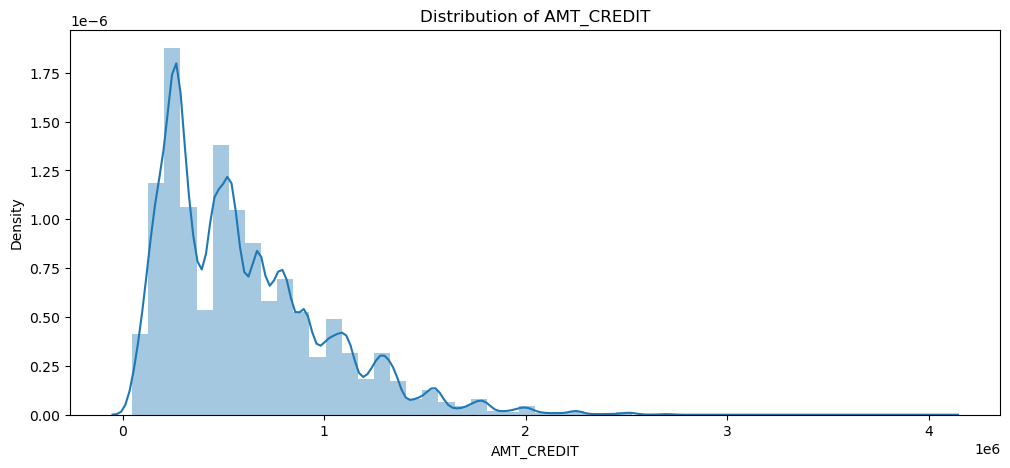

In [23]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(application_train["AMT_CREDIT"])

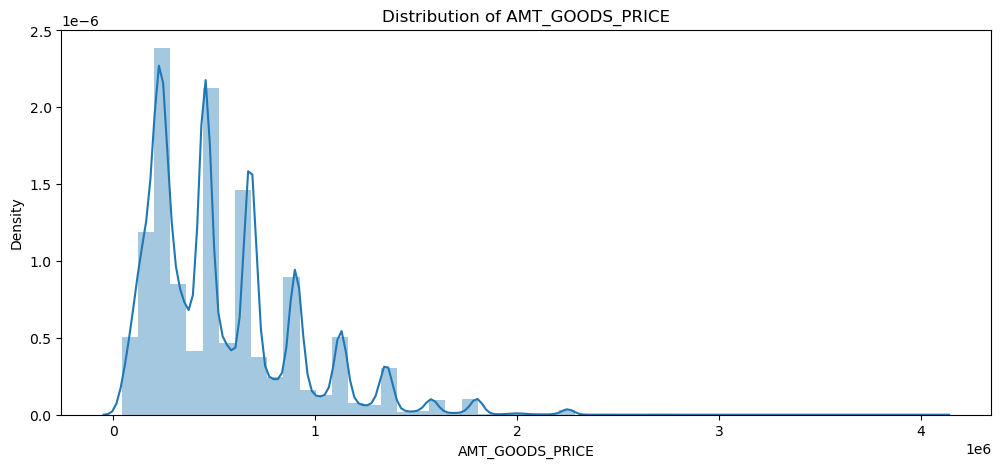

In [24]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_GOODS_PRICE")
ax = sns.distplot(application_train["AMT_GOODS_PRICE"].dropna())

As it might be expected, credits amounts and goods price have similar distribution, as the credit would be part of the whole price.   

#### Example of a behavioral data

In [29]:
temp = application_train["NAME_TYPE_SUITE"].value_counts()
#print("Total number of states : ",len(temp))
trace = go.Bar(
    x = temp.index,
    y = (temp / temp.sum())*100,
)
data = [trace]
layout = go.Layout(
    title = "Who accompanied client when applying for the  application in % ",
    xaxis=dict(
        title='Name of type of the Suite',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count of Name of type of the Suite in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='schoolStateNames')

#### Class populations

<AxesSubplot: title={'center': 'Loan Repayed or not'}, ylabel='values'>

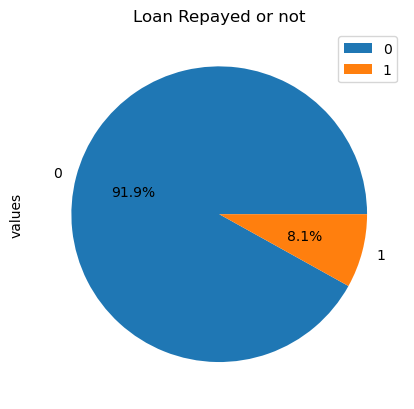

In [35]:
temp = application_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.plot.pie(y='values', title='Loan Repayed or not', autopct='%1.1f%%')

Data appears to be strongly imbalance : only 8% of the customers have had problems paying back their loan.

## Feature Engineering

Most of the Feature Engineering has been realised thanks to Aguiar's Kaggle Kernel (https://www.kaggle.com/code/jsaguiar/lightgbm-with-simple-features)

A function has been created with the feature enginnering part of this kernel, and adapted to our specific needs (mainly in missing data management). 

In [36]:
from pers_library import feat_eng

In [37]:
df_train, df_test = feat_eng.complete_process()

Train samples: 307511, test samples: 48744
Bureau df shape: (305811, 116)
Process bureau and bureau_balance - done in 38s
Previous applications df shape: (338857, 249)
Process previous_applications - done in 169s
Pos-cash balance df shape: (337252, 18)
Process POS-CASH balance - done in 66s
Installments payments df shape: (339587, 26)
Process installments payments - done in 71s
Credit card balance df shape: (103558, 141)
Process credit card balance - done in 73s
Missing value management - done in 632s


Different exports are realised, with different numbers of features (20, 50, 100, 200 and 730 (all)).
Features have been selected with a new function based on KBest algorithm.

In [38]:
from pers_library.feat_selection import KBest_filter

In [40]:
df_train_20 = KBest_filter(df_train, k_value=20)
df_train_50 = KBest_filter(df_train, k_value=50)
df_train_100 = KBest_filter(df_train, k_value=100)
df_train_200 = KBest_filter(df_train, k_value=200)

In [41]:
df_train_20.to_csv('df_train_20.csv', index=False)
df_train_50.to_csv('df_train_50.csv', index=False)
df_train_100.to_csv('df_train_100.csv', index=False)
df_train_200.to_csv('df_train_200.csv', index=False)
df_train.to_csv('df_train_full.csv', index=False)

## Modelisation

Modelisation research has been carried considering 2 algorithms : 
- A linear one : logistic regression
- A non-linear one : Random Forest

In order to conduct gridsearch of the main hyperparameters while tracking it with MLFlow, a specific function has been created : grid_search_train() from same-named module.

Hyperparameters were:
* for logistic regression:
    * solver used
    * regularization strength
* for random forest:
    * number of estimators
    * max depth of each weak classifiers

"Class_weight" parameters were defined as "balanced" for both algorithm but it appears unsufficient for the random forest regression.
In order to quantify oversampling impact on Random Forest performances, SMOTE was study as an other hyperparameter.

Finally, both gridsearch were realised with each dataset (20, 50, 100, 200).

Performances were quantified with :
* A specific metric, derivated from f1-score : f_beta-score, with beta=10, giving 10 times more importance to False Negatives than False Positives.
* Accuracy, even if it's not as relevent as usual with highly imbalanced datasets.
* Recall, quantifying false negatives.
* ROC AUC.
* Fitting time.

For practical reasons, the grid search was carried in separated notebook (notebook_gridsearch_lr.ipynb and notebook_gridsearch_rfc.ipynb).

Random Forest showing low performances, cross validation were realised to identify reasons (cv_train from pers_library.train_model)

In [1]:
from pers_library.train_model import cv_train

In [2]:
SMOTE_rfc_cv_scores = cv_train('SMOTE_rfc_cv', model_choice='rfc', estimators_number=20, apply_SMOTE=True)
rfc_cv_scores = cv_train('rfc_cv', model_choice='rfc', estimators_number=20, apply_SMOTE=False)

  Fit time: 37.483607339859006
  Accuracy: 0.9016361456067965
  Recall score: 0.07094662638469285
  AUC score: 0.6656957214953368
  F10 score: 0.07206272850468307
  Fit time: 16.546769285202025
  Accuracy: 0.9187008394138332
  Recall score: 0.010120845921450152
  AUC score: 0.6730346962999993
  F10 score: 0.009660174275218513


In [11]:
print(
    ' train accuracy:', SMOTE_rfc_cv_scores['train_accuracy'].mean(),
    '\n-------------------------------------------\n',
    'test accuracy:', SMOTE_rfc_cv_scores['test_accuracy'].mean()
    )

 train accuracy: 0.9973913131846913 
-------------------------------------------
 test accuracy: 0.9016361456067965


In [13]:
print(
    ' train accuracy:', rfc_cv_scores['train_accuracy'].mean(),
    '\n-------------------------------------------\n',
    'test accuracy:', rfc_cv_scores['test_accuracy'].mean()
    )

 train accuracy: 0.9937287860002846 
-------------------------------------------
 test accuracy: 0.9187008394138332


In [14]:
lr_cv_scores = cv_train('lr_cv', model_choice='lr')

  Fit time: 1.1870042324066161
  Accuracy: 0.6851974553362737
  Recall score: 0.6603726082578045
  AUC score: 0.7359849197093622
  F10 score: 0.6399665999498756


Results in MLflow ui show bad performances with only class_weight=blanced but a strong overfitting when using SMOTE.

Best performances for logistic regression, with "lbfgs" or "liblinear" and no real impact of regularization strength, with 200 features.

New logistic regression is train with all features, and 200 are selected from model, in order to optimize (model, features).

In [15]:
from pers_library.train_model import train

In [30]:
lr_full, class_report, confusion_m, X_test, y_test = train(
                                                        "lr_all_features", 
                                                        n_features='full', 
                                                        model_choice='lr',
                                                        )

  Fit time: 69.82109570503235
  Accuracy: 0.7075542258788332
  Recall score: 0.7047331319234642
  AUC score: 0.7062675511572678
  F10 score: 0.6841936114644378


In [31]:
print(class_report)

              precision    recall  f1-score   support

         0.0       0.96      0.71      0.82     56537
         1.0       0.17      0.70      0.28      4965

    accuracy                           0.71     61502
   macro avg       0.57      0.71      0.55     61502
weighted avg       0.90      0.71      0.77     61502



In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

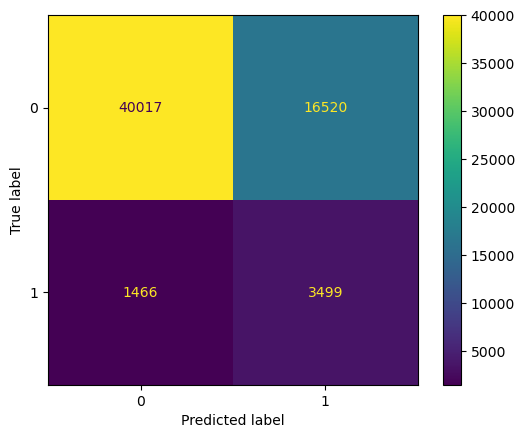

In [25]:
ConfusionMatrixDisplay(confusion_m).plot(values_format='d')

In [17]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectFromModel

In [18]:
df_full = pd.read_csv("df_train_full.csv")
feature_names = np.array(df_full.columns[2:])

feature_selector = SelectFromModel(lr_full[1], prefit=True, max_features=200)
selected_features_mask = feature_selector.get_support()

selected_feature_names = feature_names[selected_features_mask].tolist()
df_full = df_full[["SK_ID_CURR","TARGET"]+selected_feature_names]

In [19]:
df_full.to_csv("df_train_model_selected.csv", index=False)

In [26]:
lr_selected, class_report, confusion_m, X_test, y_test = train(
                                                        "lr_model_selected_features", 
                                                        n_features='model_selected', 
                                                        model_choice='lr',
                                                        )

  Fit time: 16.582361936569214
  Accuracy: 0.7032779421807421
  Recall score: 0.6986908358509567
  AUC score: 0.701185805636181
  F10 score: 0.6780609302487605


In [28]:
print(class_report)

              precision    recall  f1-score   support

         0.0       0.96      0.70      0.81     56537
         1.0       0.17      0.70      0.28      4965

    accuracy                           0.70     61502
   macro avg       0.57      0.70      0.54     61502
weighted avg       0.90      0.70      0.77     61502



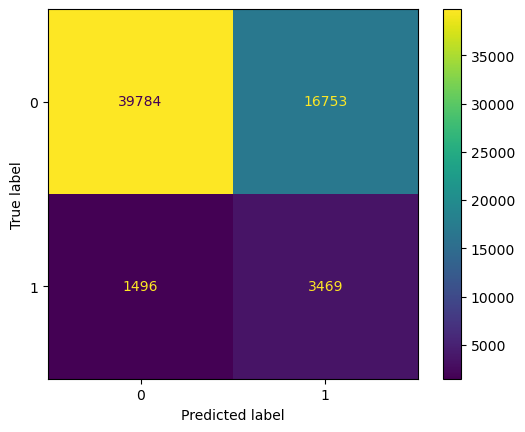

In [29]:
ConfusionMatrixDisplay(confusion_m).plot(values_format='d')

Good performances are reached with 200 model selected features, with a low loss compared to a model with all the features.
In order to characterize performances, a dummy classifier is trained as a comparison.

F10-score Stratified Dummy: 0.0816321582209039
Recall-score Stratified Dummy: 0.08164931618697693
Precisioon-score Stratified Dummy: 0.07995202878273036
Accuracy Stratified Dummy: 0.8520048128516146

-----------------------------------

F10-score Dummy (SMOTE): 0.4741920729363652
Recall-score Dummy (SMOTE): 0.49867319861196163
Precisioon-score Dummy (SMOTE): 0.08024569701747471
Accuracy Dummy (SMOTE): 0.5047803323469156
Confusion Matrix:
 [[28602 28001]
 [ 2456  2443]]


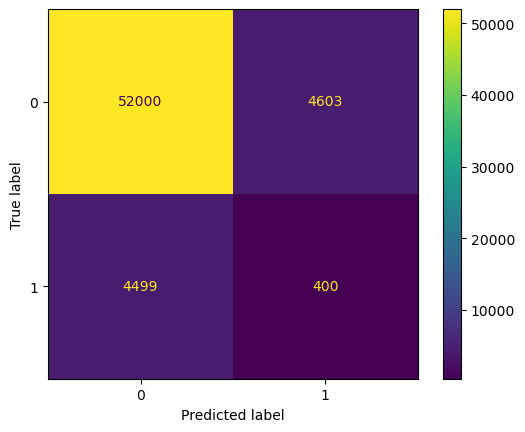

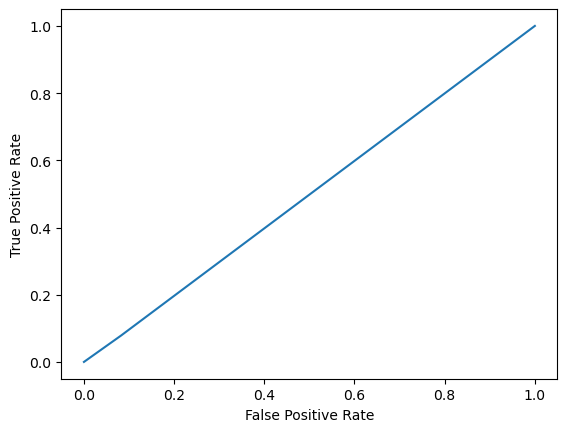

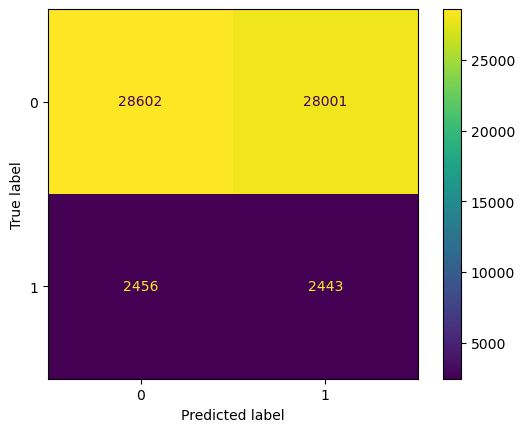

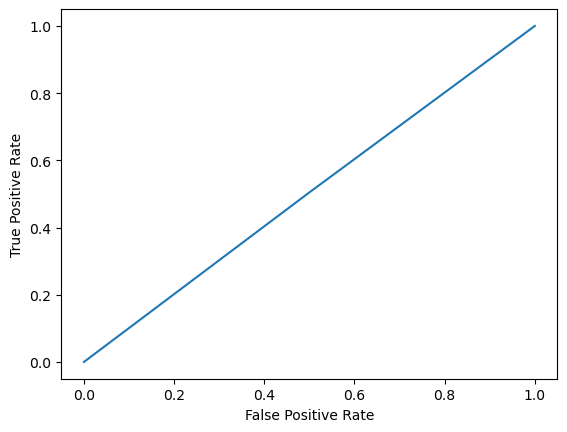

In [33]:
import pandas as pd
df_selected = pd.read_csv("df_train_model_selected.csv")

X = df_selected.drop(["TARGET","SK_ID_CURR"], axis=1)
y = df_selected["TARGET"]

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2)

dmc = DummyClassifier(strategy="stratified")
dmc.fit(X_train, y_train)

y_pred = dmc.predict(X_test)
y_proba_list = dmc.predict_proba(X_test).tolist()
y_proba_pos = [proba[1] for proba in y_proba_list]

from sklearn.metrics import (
    fbeta_score,
    recall_score, 
    accuracy_score, 
    precision_score, 
    confusion_matrix, 
    ConfusionMatrixDisplay,
    roc_curve,
    RocCurveDisplay
)

cm = confusion_matrix(y_test, y_pred)

print("F10-score Stratified Dummy:", fbeta_score(y_test, y_pred, beta=10))
print("Recall-score Stratified Dummy:", recall_score(y_test, y_pred))
print("Precisioon-score Stratified Dummy:", precision_score(y_test, y_pred))
print("Accuracy Stratified Dummy:", accuracy_score(y_test, y_pred))
cm_display = ConfusionMatrixDisplay(cm).plot()
fpr, tpr, thr = roc_curve(y_test, y_proba_pos)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n-----------------------------------\n")

from imblearn.over_sampling import SMOTE

sm=SMOTE()
X_res, y_res = sm.fit_resample(X_train, y_train)
smote_dmc = DummyClassifier(strategy="stratified").fit(X_res,y_res)
smote_y_pred = smote_dmc.predict(X_test)
y_proba_list = smote_dmc.predict_proba(X_test).tolist()
y_proba_pos = [proba[1] for proba in y_proba_list]

SMOTE_cm = confusion_matrix(y_test, smote_y_pred)

print("F10-score Dummy (SMOTE):", fbeta_score(y_test, smote_y_pred, beta=10))
print("Recall-score Dummy (SMOTE):", recall_score(y_test, smote_y_pred))
print("Precisioon-score Dummy (SMOTE):", precision_score(y_test, smote_y_pred))
print("Accuracy Dummy (SMOTE):", accuracy_score(y_test, smote_y_pred))
SMOTE_cm_display = ConfusionMatrixDisplay(SMOTE_cm).plot()
fpr, tpr, thr = roc_curve(y_test, y_proba_pos)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
print("Confusion Matrix:\n", confusion_matrix(y_test, smote_y_pred))

Both dummy classifier are less efficient to identify true positives

In [ ]:
# Pipeline export
import joblib
joblib.dump(lr_selected, "pipe_lr_model_selected.joblib")